# Pediatric Bone Marrow Transplant Survival Classification

### Introduction
Unmanipulated allogeneic hematopoietic stem cell transplantation is a commonly used and effective treatment for children with various hematologic diseases. This treatment functions by transplanting healthy CD34+ stem cells from a donor to the afflicted child. It has been proven in Kałwak et al.’s 2010 study (https://www.sciencedirect.com/science/article/pii/S1083879110001485?via%3Dihub#sec4) that higher doses of CD34+ stem cells are associated with a higher chance of survival for the recipient and a lower chance of relapse. Certain factors are influential in predicting a child’s chance of survival following the transplant, including the age of the donor and recipient, the recipient’s body mass, and the dosage of CD34+ stem cells administered to the patient.

Using the bone marrow transplant dataset available to us, can we predict whether a future pediatric patient with a hematologic disease who receives a bone marrow transplant is likely to survive or not?

The dataset describes cases of pediatric patients with malignant and nonmalignant hematologic diseases. All of the patients in the dataset received hematopoietic stem cell transplants. These the five different variables we used to answer our question:
* Donor_Age - Age of the donor when hematopoietic stem cells were removed 
* Recipient_Age - Age of the recipient when the hematopoietic stem cells were transplanted
* CD34_Dose - CD34+ cell dose per kg of recipient body weight (10^6/kg)
* Body_Mass - Body mass of the recipient at the time of transplantation,
* Survival_Status - The survival status of the recipient after the transplant (0 - deceased, 1 - survived)

### Preliminary Exploratory Data Analysis

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dbplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
#reading the dataset into R
bone_marrow <- read_csv("https://raw.githubusercontent.com/rishiiii3/dsci-100-2023S-group-67/main/bone-marrow.arff", 
                        skip = 108, col_names = FALSE)
bone_marrow

Rows: 187 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): X8, X9, X10, X11, X12, X13, X14, X20, X21, X28, X30, X31, X32
dbl (24): X1, X2, X3, X4, X5, X6, X7, X15, X16, X17, X18, X19, X22, X23, X24...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,22.83014,0,1,0,1,1,1,0,⋯,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,0,23.34247,0,1,0,-1,-1,1,0,⋯,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
1,0,26.39452,0,1,0,-1,-1,1,0,⋯,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
0,0,39.68493,1,1,0,1,2,1,1,⋯,?,4.25,29.481647,0.14,50,23,29,19,53,1
0,1,33.35890,0,0,0,1,2,0,1,⋯,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
1,0,27.39178,0,0,0,2,0,1,1,⋯,1,3.27,8.412758,0.39,40,16,70,1000000,2800,0
0,1,34.52055,0,1,0,0,1,0,1,⋯,?,17.78,2.406248,7.39,51,17,29,18,41,1
1,0,21.43562,0,1,0,0,1,1,1,⋯,?,6.41,?,?,56,22,58,22,45,1
1,1,32.64110,0,0,0,2,0,1,1,⋯,1,23.54,3.772555,6.24,20.5,15,14,1000000,671,0


In [4]:
#cleaning and wrangling the dataset into tidy form
bone_marrow_selected <- select(bone_marrow, X3, X23, X29, X32,X37) |> 
rename(  Donor_Age = X3 ,
         Recipient_Age = X23,
         CD34_Dose = X29,
         Body_Mass = X32,
         Survival_Status = X37) |>
mutate(Survival_Status = as_factor(Survival_Status)) |>
mutate(Body_Mass = as.numeric(Body_Mass))
bone_marrow_selected[bone_marrow_selected == "?"] <- "NA" #this step was used because researchers used ? instead of NA
bone_marrow_selected |> is.na()|> sum()

#filter(!(is.na(bone_marrow_selected)))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


[1] 2

There are 2 rows that have missing data

In [21]:
bone_marrow_clean <- bone_marrow_selected |> drop_na(Donor_Age:Survival_Status)
bone_marrow_clean

Donor_Age,Recipient_Age,CD34_Dose,Body_Mass,Survival_Status
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
22.83014,9.6,7.20,35.0,0
23.34247,4.0,4.50,20.6,1
26.39452,6.6,7.94,23.4,1
39.68493,18.1,4.25,50.0,1
33.35890,1.3,51.85,9.0,0
27.39178,8.9,3.27,40.0,0
34.52055,14.4,17.78,51.0,1
21.43562,18.2,6.41,56.0,1
32.64110,7.9,23.54,20.5,0


The data above is in a tidy format.

In [22]:
#splitting data into training and testing
bone_marrow_split <- initial_split(bone_marrow_clean, prop= 0.75, strata = Survival_Status)
bone_marrow_train <- training(bone_marrow_split)
bone_marrow_test <- testing(bone_marrow_split)

In [23]:
#summarizing the training data by mean values for each predictor in the dataset
mean_predictors <- bone_marrow_train |> 
summarize(across(Donor_Age:Body_Mass, mean, na.rm = TRUE))
mean_predictors

Donor_Age,Recipient_Age,CD34_Dose,Body_Mass
<dbl>,<dbl>,<dbl>,<dbl>
33.48195,9.754348,12.02364,34.86196


In [24]:
#summarizing the training data by counting survival status observations
obs_per_class <- bone_marrow_train |> 
    group_by(Survival_Status) |> 
    summarise(count = n())
obs_per_class

Survival_Status,count
<fct>,<int>
0,76
1,62


The number of observations for each class where:
0 represents deceased and 1 represents survived

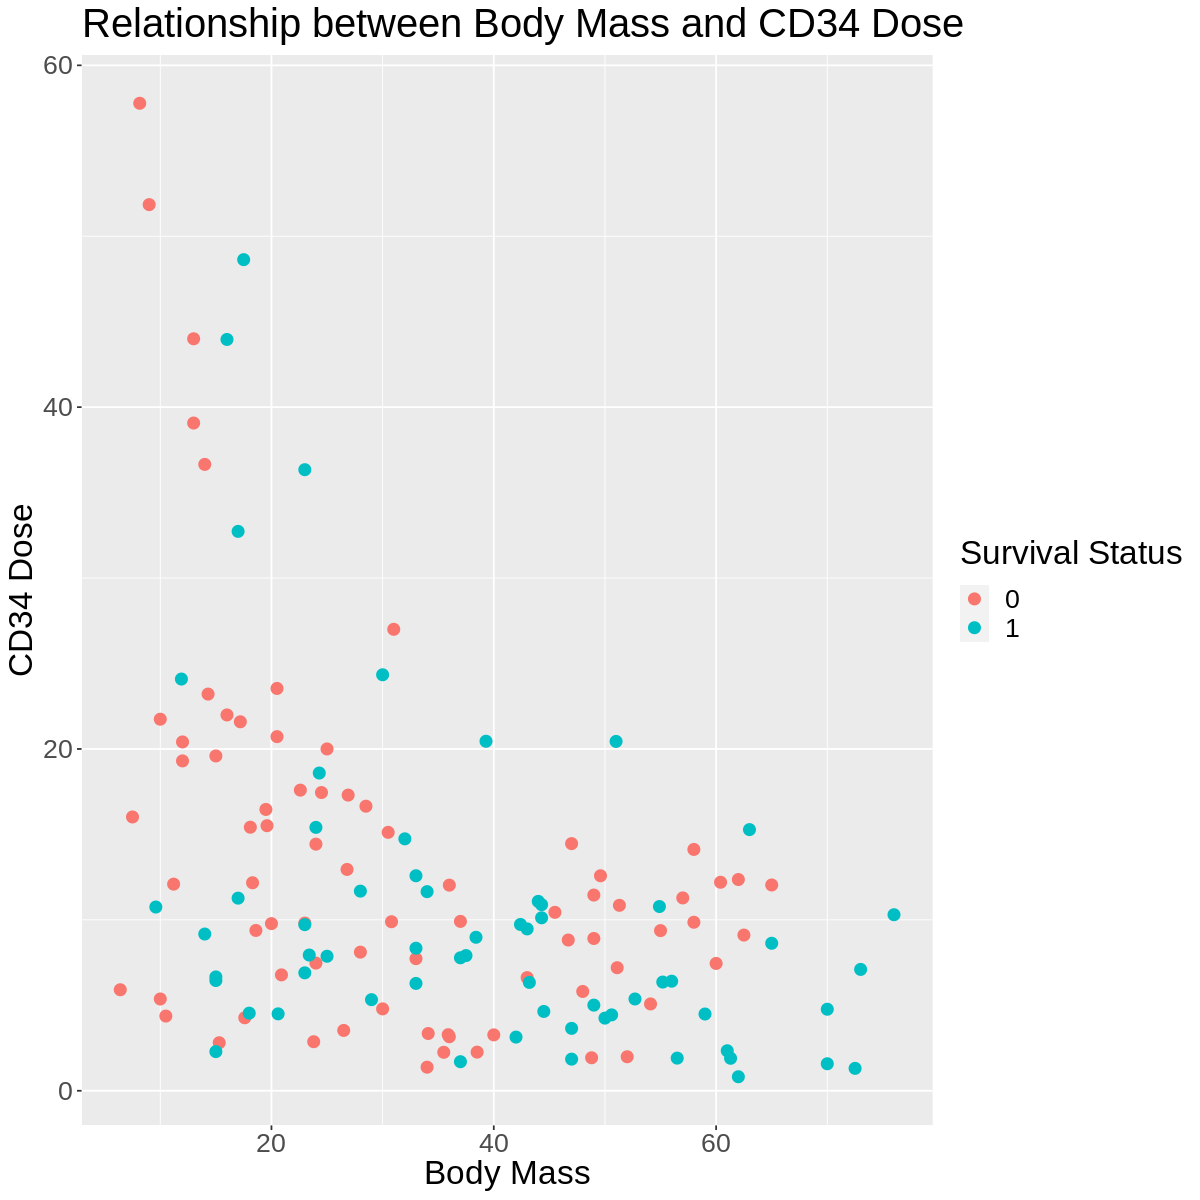

In [25]:
#visualizing the data
options(repr.plot.width = 10, repr.plot.height = 10)
CD34_vs_body_mass = ggplot(bone_marrow_train, aes(x = Body_Mass, y = CD34_Dose, color = Survival_Status))+
       geom_point(size = 3) +
       labs(x = "Body Mass", y = "CD34 Dose", color= "Survival Status") +
       ggtitle("Relationship between Body Mass and CD34 Dose") +
       theme(text = element_text(size = 20))
CD34_vs_body_mass

### Methods
We loaded the data into the table by using the read_csv function, and chose four relevant predictors based on the most important variables in Kałwak et al.’s study. The aim of our classifier is to predict a future patient’s survival status according to its recipient age, donor age, CD34+ dosage, and body mass. We renamed the columns with the names in the dataset’s information and split the data into training data and testing data in preparation for the model building process. After that, we visualized the results using R’s pairs function to observe the correlations between different variables. We will also create scatterplots to visualize the impacts of different predictors on survival status. We aim to build a K-nearest neighbors classification model to accurately classify new observations as either deceased or survived based on our predictors. To do this, we will use cross-validation to tune the model and evaluate the model’s accuracy by testing its predictions on the testing dataset.

### Expected Outcomes and Significance

We expect to find that there exists a correlation between the different predictors that we used for our prediction and that it is possible to accurately predict the chances of survival of a patient based on these predictors. Specifically, we expect to find that as CD34+ stem cell dosage increases, chances of survival increase. 

These findings could reveal what the most important factors for predicting patient survival post-transplant are. Medical personnel could use these findings to adapt treatment regimens in order to improve survival outcomes for future patients. 

Future questions that our project could pose are:
* How can the chances of survival of future patients be improved?
* How can the donor’s compatibility with the recipient be optimized?


In [26]:
options(repr.plot.width = 15, repr.plot.height = 15)
library(GGally)
library(ggplot2)
library(dplyr)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



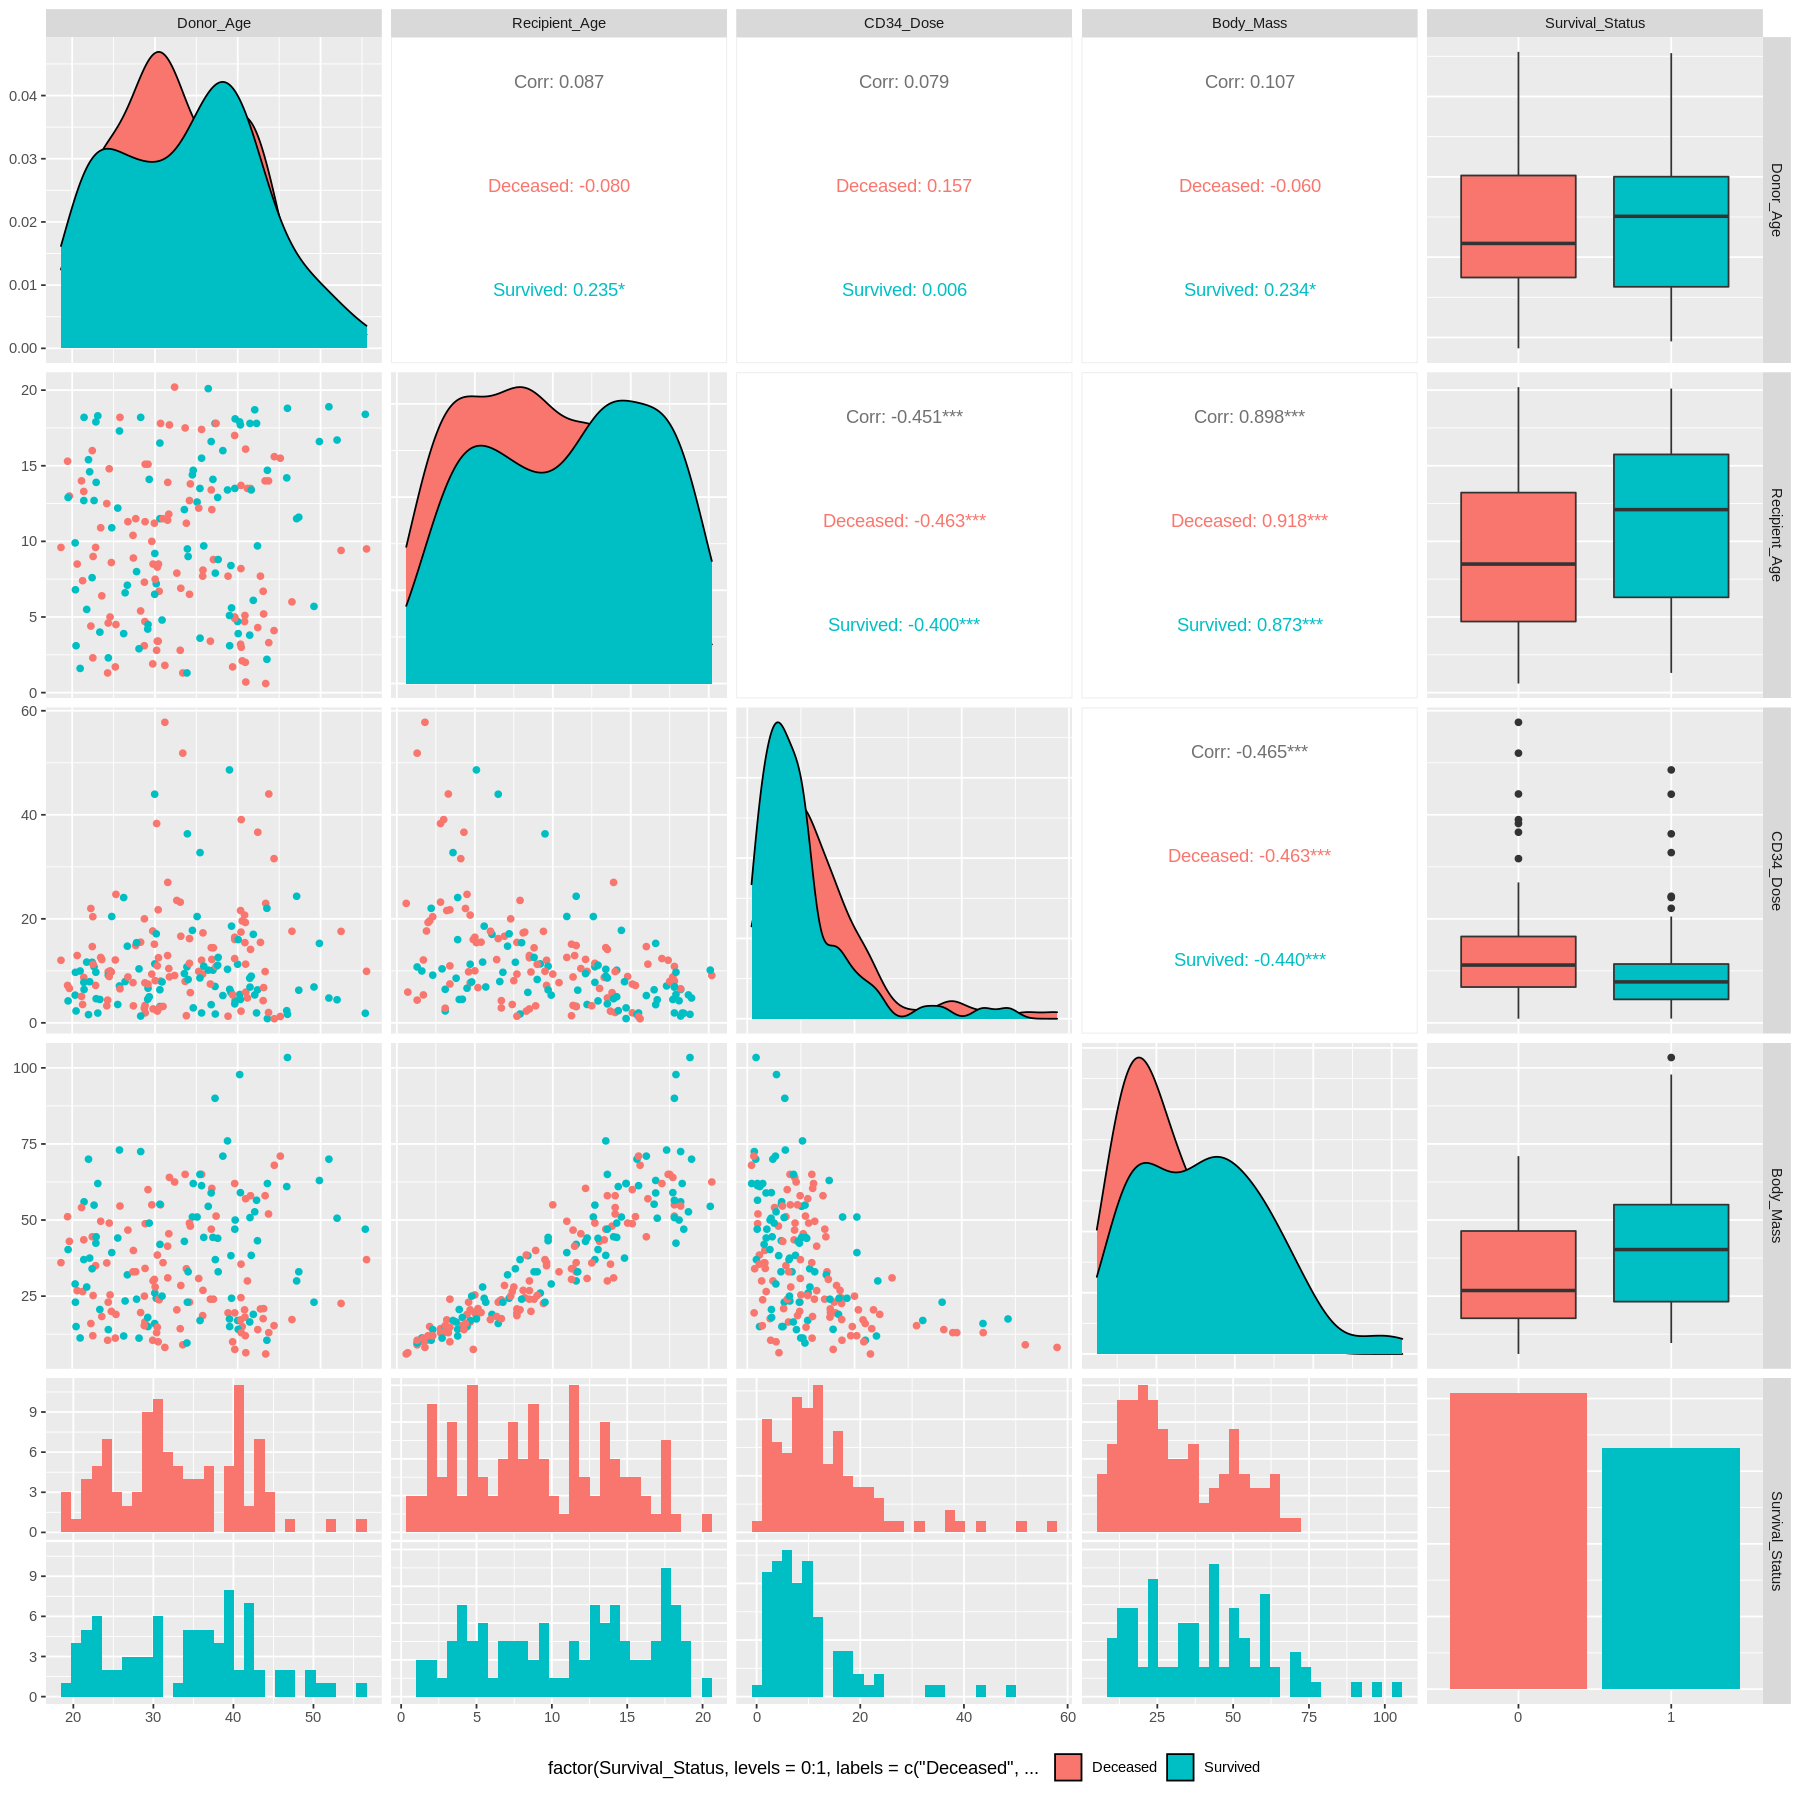

In [27]:
bone_marrow_clean |> ggpairs( legend = 1, 
                   aes(color = factor(Survival_Status, levels = 0:1, labels = c("Deceased", "Survived")))) + 
  theme(legend.position = "bottom") + 
  labs(color = "Survival Status")

In [56]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("classification") 

knn_recipe <- recipe(Survival_Status ~ CD34_Dose + Body_Mass + Donor_Age + Recipient_Age, data = bone_marrow_train) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

In [57]:
knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = bone_marrow_vfold, grid = 10) |>
  collect_metrics() 

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5788816,5,0.04439312,Preprocessor1_Model01
1,roc_auc,binary,0.5738782,5,0.04653461,Preprocessor1_Model01
3,accuracy,binary,0.5434136,5,0.01806922,Preprocessor1_Model02
3,roc_auc,binary,0.5537393,5,0.02303841,Preprocessor1_Model02
5,accuracy,binary,0.5214559,5,0.04759105,Preprocessor1_Model03
5,roc_auc,binary,0.5552350,5,0.04386269,Preprocessor1_Model03
6,accuracy,binary,0.5214559,5,0.04759105,Preprocessor1_Model04
6,roc_auc,binary,0.5812393,5,0.03939451,Preprocessor1_Model04
8,accuracy,binary,0.5638387,5,0.03625833,Preprocessor1_Model05


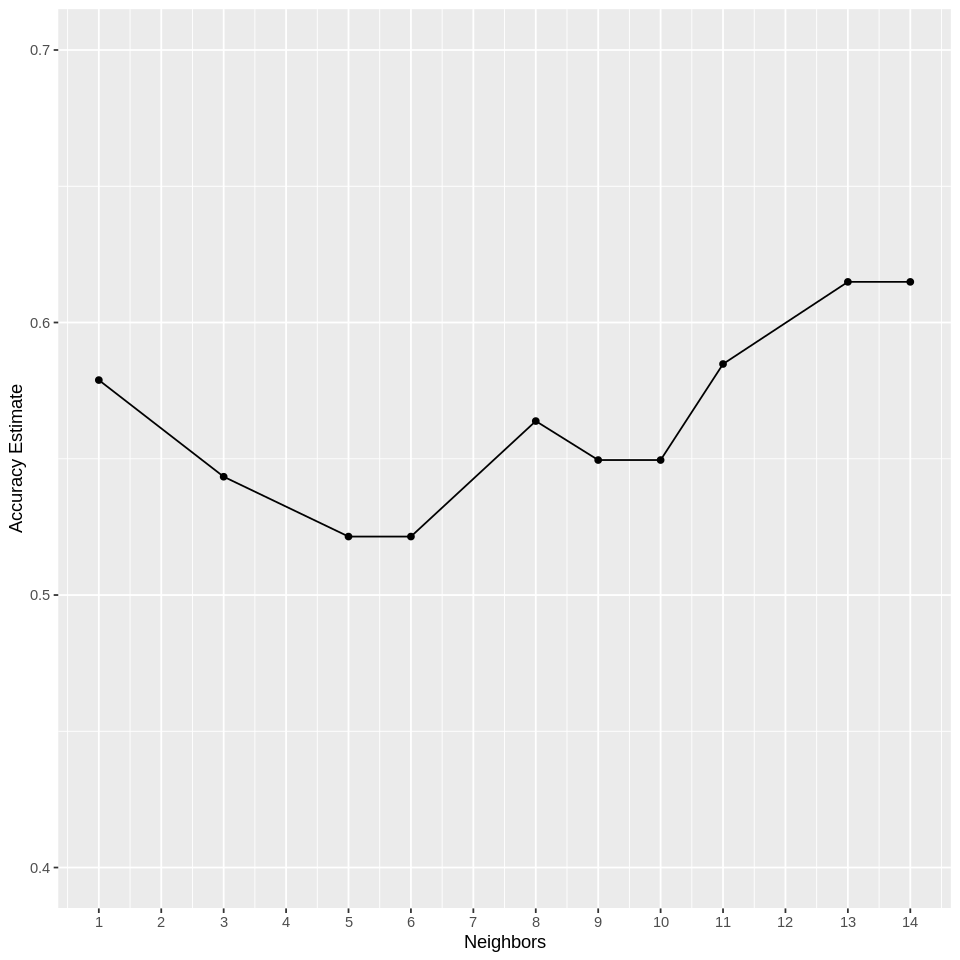

In [71]:
options(repr.plot.width = 8, repr.plot.height = 8)
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 15, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 0.7)) 

accuracy_versus_k

As the graph shown, nearest neighbors of 13 to 14 is the best choice with largest accuracy.

In [59]:
bone_marrow_vfold <- vfold_cv(bone_marrow_train, v = 5, strata = Survival_Status)
bone_marrow_vfold

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [60]:
bone_marrow_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
       set_engine("kknn") |>
       set_mode("classification")

bone_marrow_recipe <- recipe(Survival_Status ~ CD34_Dose + Body_Mass + Donor_Age + Recipient_Age, data = bone_marrow_clean) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

In [61]:
bone_marrow_resample_fit <- workflow() |>
       add_recipe(bone_marrow_recipe) |>
       add_model(bone_marrow_spec) |>
       fit_resamples(resamples = bone_marrow_vfold)

In [62]:
bone_marrow_fit <- workflow() |>
       add_recipe(bone_marrow_recipe) |>
       add_model(bone_marrow_spec) |>
       fit_resamples(resamples = bone_marrow_vfold)
bone_marrow_fit

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [55]:
bone_marrow_metrics = bone_marrow_fit |>
        collect_metrics() 
bone_marrow_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6149152,5,0.02223157,Preprocessor1_Model1
roc_auc,binary,0.5733761,5,0.05180122,Preprocessor1_Model1
